<a href="https://colab.research.google.com/github/alefianismail/python_election_indonesia/blob/main/election_indonesian_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTAL** **MODULE**

In [ ]:
!pip install pandas==1.5.3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline
import datetime
from wordcloud import WordCloud
import plotly
from matplotlib import rcParams
import plotly.express as px
import plotly.figure_factory as ff
import re
import string
from PIL import Image
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**IMPORT FILE CSV**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_anies = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Indonesia_Presidential_Candidates_Dataset_2024/cleaned_data/Anies_Baswedan.csv')
df_ganjar = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Indonesia_Presidential_Candidates_Dataset_2024/cleaned_data/Ganjar Pranowo.csv')
df_prabowo = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Indonesia_Presidential_Candidates_Dataset_2024/cleaned_data/Prabowo Subianto.csv')
df_anies.head()

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label,subject
0,0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,"['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']",Positive,Anies Baswedan
1,1,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,"['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...",Positive,Anies Baswedan
2,2,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr', 'anies', 'continued', '', 'we', 'will',...",Positive,Anies Baswedan
3,3,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,"['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive,Anies Baswedan
4,4,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive,Anies Baswedan


**CONCAT ALL CSV**

In [ ]:
pd.df = pd.concat([df_anies, df_ganjar, df_prabowo])
pd.df.head()


,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label,subject,Unnamed: 0
0,0.0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,"['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']",Positive,Anies Baswedan,NaN
1,1.0,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,"['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...",Positive,Anies Baswedan,NaN
2,2.0,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr', 'anies', 'continued', '', 'we', 'will',...",Positive,Anies Baswedan,NaN
3,3.0,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,"['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive,Anies Baswedan,NaN
4,4.0,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive,Anies Baswedan,NaN


In [ ]:
pd.df

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label,subject,Unnamed: 0
0,0.0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,"['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']",Positive,Anies Baswedan,NaN
1,1.0,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,"['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...",Positive,Anies Baswedan,NaN
2,2.0,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr', 'anies', 'continued', '', 'we', 'will',...",Positive,Anies Baswedan,NaN
3,3.0,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,"['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive,Anies Baswedan,NaN
4,4.0,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive,Anies Baswedan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,9995.0,2022-12-08 08:32:40+00:00,2016-09-30 15:25:40+00:00,7.820000e+17,50,104,4398,"East Kalimantan, Indonesia","sir, if the community always goes down, it wil...","['sir', ',', 'if', 'the', 'community', 'always...","['sir', ',', 'if', 'the', 'community', 'always...","['sir', ',', 'if', 'the', 'community', 'always...","['sir', '', 'if', 'the', 'community', 'always'...",Positive,Prabowo Subianto,NaN
6753,9996.0,2022-12-08 08:26:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,"young prabowo is really cool, bismillah sir, g...","['young', 'prabowo', 'is', 'really', 'cool', '...","['young', 'prabowo', 'is', 'really', 'cool', '...","['young', 'prabowo', 'is', 'really', 'cool', '...","['young', 'prabowo', 'is', 'really', 'cool', '...",Positive,Prabowo Subianto,NaN
6754,9997.0,2022-12-08 08:06:00+00:00,2022-12-01 13:23:45+00:00,1.600000e+18,11,3,67,Surabaya,"basically, prabowo is great and was chosen as ...","['basically', ',', 'prabowo', 'is', 'great', '...","['basically', ',', 'prabowo', 'is', 'great', '...","['basically', ',', 'prabowo', 'is', 'great', '...","['basically', '', 'prabowo', 'is', 'great', 'a...",Positive,Prabowo Subianto,NaN
6755,9998.0,2022-12-08 08:05:00+00:00,2022-12-02 02:44:35+00:00,1.600000e+18,50,83,103,NaN,optimistic about being the best figure in the ...,"['optimistic', 'about', 'being', 'the', 'best'...","['optimistic', 'about', 'being', 'the', 'best'...","['optimistic', 'about', 'being', 'the', 'best'...","['optimistic', 'about', 'being', 'the', 'best'...",Positive,Prabowo Subianto,NaN


**VIEW** **COLUMN**

In [ ]:
print(pd.df.columns)

Index(['Unnamed: 0.1', ' Date', ' Created', ' User ID', ' Followers',
       ' Following', ' Tweet Count', ' TweetLocation', 'Text', 'tweet_tokens',
       'tweet_tokens_WSW', 'tweet_normalized', 'tweet_tokens_stemmed', 'label',
       'subject', 'Unnamed: 0'],
      dtype='object')


**MISSING NaN Value in COLUMN ALL CANDIDATE**

In [ ]:
!pip install sidetable==0.9.0
import sidetable

pd.df.stb.missing()

,missing,total,percent
Unnamed: 0,15613,23449,66.582797
TweetLocation,12271,23449,52.330590
Unnamed: 0.1,7836,23449,33.417203
Text,3,23449,0.012794
label,3,23449,0.012794
Date,0,23449,0.000000
Created,0,23449,0.000000
User ID,0,23449,0.000000
Followers,0,23449,0.000000
Following,0,23449,0.000000


**COUNT TWEET LOCATION**

In [ ]:
pd.df[' TweetLocation'].value_counts()

,TweetLocation
Indonesia,2577
"DKI Jakarta, Indonesia",682
Jakarta,513
"East Nusa Tenggara, Indonesia",315
"Jakarta, Indonesia",206
...,...
Central Ketungau District,1
Boyolali & Bekasi,1
"Gresik, Indonesia",1
poppies land,1


**COUNT TWEET CANDIDATE VS**

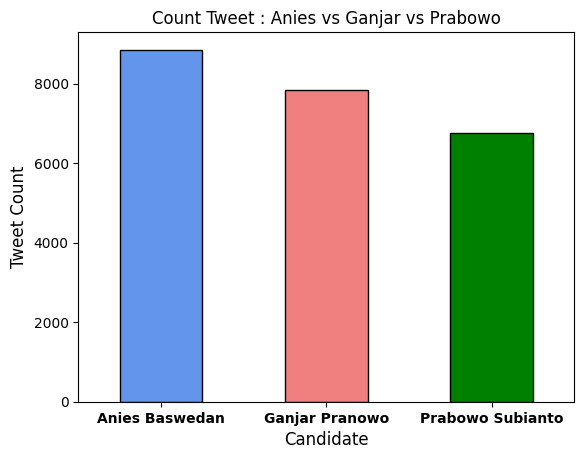

In [ ]:
pd.df.groupby(['subject'])['Text'].count().plot(kind='bar', title = 'Count Tweet : Anies vs Ganjar vs Prabowo', edgecolor = 'black', color = ['cornflowerblue', 'lightcoral', 'Green'])
plt.xticks(rotation = 0, weight='bold')
plt.xlabel('Candidate', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.show()

**FOLLOWER USER MAKE A TWEET**

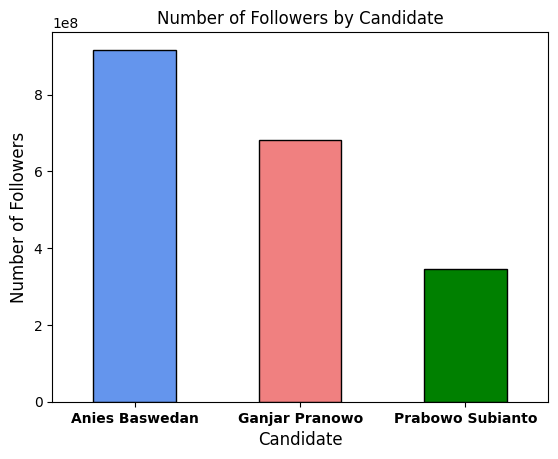

In [ ]:
pd.df.groupby(['subject'])[' Followers'].sum().plot(kind='bar', title='Number of Followers by Candidate', edgecolor='black', color=['cornflowerblue', 'lightcoral', 'green'])
plt.xticks(rotation = 0, weight='bold')
plt.xlabel('Candidate', fontsize=12)
plt.ylabel('Number of Followers', fontsize=12)
plt.show()

**FIND UNIQUE LOCATION**

In [ ]:
pd.df[' TweetLocation'].unique()

array([nan, ' Palmerah, Jakarta', ' North Jakarta', ...,
       ' Gowa, South Sulawesi', ' Anyer, Indonesia',
       ' Lhoksumawe City, Nangro Aceh D'], dtype=object)

In [ ]:
pd.df[' TweetLocation'].value_counts()

,TweetLocation
Indonesia,2577
"DKI Jakarta, Indonesia",682
Jakarta,513
"East Nusa Tenggara, Indonesia",315
"Jakarta, Indonesia",206
...,...
Central Ketungau District,1
Boyolali & Bekasi,1
"Gresik, Indonesia",1
poppies land,1


**SORTED VALUE AND COMBINE DATA LOCATION ALL CANDIDATE**

In [ ]:
sorted_anies_location = df_anies.groupby(' TweetLocation').size().sort_values(ascending=False)[:10]
sorted_anies_location.name = 'Anies'

sorted_ganjar_location = df_ganjar.groupby(' TweetLocation').size().sort_values(ascending=False)[:10]
sorted_ganjar_location.name = 'Ganjar'

sorted_prabowo_location = df_prabowo.groupby(' TweetLocation').size().sort_values(ascending=False)[:10]
sorted_prabowo_location.name = 'Prabowo'

combine_counts_location = pd.merge(sorted_anies_location, sorted_ganjar_location, left_index=True, right_index=True, how='outer').merge(sorted_prabowo_location, left_index=True, right_index=True, how='outer')

In [ ]:
combine_counts_location.head()

,Anies,Ganjar,Prabowo
TweetLocation,,,
"Bali, Indonesia",NaN,112.0,NaN
Banten,NaN,128.0,NaN
"Central Jakarta, DKI Jakarta",NaN,92.0,NaN
"Central Java, Indonesia",62.0,78.0,NaN
"DKI Jakarta, Indonesia",240.0,246.0,196.0


**RENAME ALL LOCATION**

In [ ]:
combine_counts_location = combine_counts_location.rename(index={' East Nusa Tenggara, Indonesia': 'NTT'})
combine_counts_location = combine_counts_location.rename(index={' South Jakarta, DKI Jakarta': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Jakarta, Indonesia': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Tanjung Priok, Indonesia': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Central Java, Indonesia': 'Prov. Jateng'})
combine_counts_location = combine_counts_location.rename(index={' Central Kalimantan, Indonesia': 'Prov. Kaltim'})
combine_counts_location = combine_counts_location.rename(index={' DKI Jakarta, Indonesia': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Central Jakarta, DKI Jakarta': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Jakarta Capital Region': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Kebayoran Lama, Indonesia': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Lebak, Banten province': 'Prov. Banten'})
combine_counts_location = combine_counts_location.rename(index={'NTT': 'Prov. NTT'})
combine_counts_location = combine_counts_location.rename(index={' Banten': 'Prov. Banten'})
combine_counts_location = combine_counts_location.rename(index={' Surabaya City, East Java': 'Prov. Jatim'})
combine_counts_location = combine_counts_location.rename(index={' Medan City, North Sumatra': 'Prov. Sumut'})
combine_counts_location = combine_counts_location.rename(index={' JAKARTA': 'DKI Jakarta'})
combine_counts_location = combine_counts_location.rename(index={' Jakarta': 'DKI Jakarta'})









In [ ]:
combine_counts_location = combine_counts_location.rename(index={'Prov. Jawa Tengah': 'Prov. Jateng'})
combine_counts_location = combine_counts_location.rename(index={'Prov. Jawa Timur': 'Prov. Jatim'})
combine_counts_location = combine_counts_location.rename(index={'Prov. Kalimantan Timur': 'Prov. Kaltim'})
combine_counts_location = combine_counts_location.rename(index={' Bali, Indonesia': 'Prov. Bali'})
combine_counts_location = combine_counts_location.rename(index={' East Kalimantan, Indonesia': 'Prov. Kaltim'})



In [ ]:
combine_counts_location = combine_counts_location.drop(' Dream Island', errors='ignore')
combine_counts_location = combine_counts_location.drop(' The subconscious', errors='ignore')
combine_counts_location = combine_counts_location.drop(' Tomsk Oblast', errors='ignore')

In [ ]:
combine_counts_location = combine_counts_location.rename(index={' Jakarta':'DKI Jakarta', ' Palmerah, Jakarta': 'DKI Jakarta', ' North Jakarta' : 'DKI Jakarta', ' Anyer, Indonesia': 'Prov. Banten', ' Gresik, Indonesia' : 'Prov. Jatim', ' Lhoksumawe City, Nangro Aceh D' : 'Prov. Aceh', ' Gowa, South Sulawesi':'Prov. Sulsel',  })


In [ ]:
print(combine_counts_location.index)

Index(['Prov. Bali', 'Prov. Banten', 'DKI Jakarta', 'Prov. Jateng',
       'DKI Jakarta', 'Prov. Kaltim', 'Prov. NTT', ' Indonesia', 'DKI Jakarta',
       'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta', 'DKI Jakarta',
       'Prov. Banten', 'Prov. Sumut', 'DKI Jakarta', 'Prov. Jatim',
       'DKI Jakarta'],
      dtype='object', name=' TweetLocation')


In [ ]:
combine_counts_location = combine_counts_location.groupby(combine_counts_location.index).sum()

**TOP COUNT TWEET LOCATION ALL CANDIDATE (PROVINCE)**

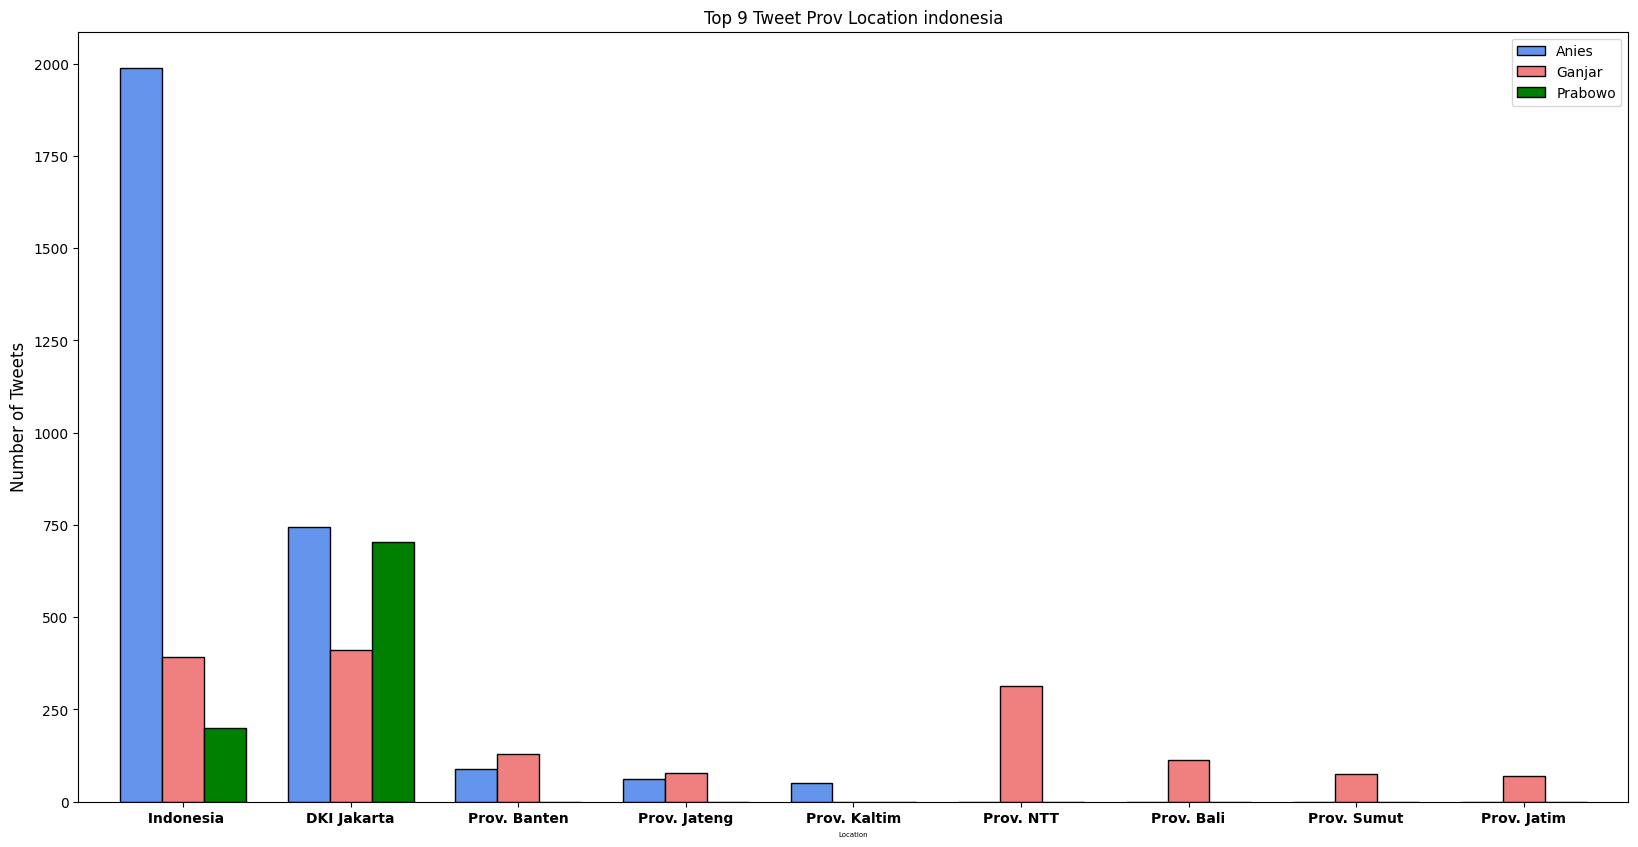

In [ ]:
combine_counts_location = combine_counts_location.sort_values(by=['Anies', 'Ganjar', 'Prabowo'], ascending=False)
combine_counts_location.plot(kind='bar', title='Top 9 Tweet Prov Location indonesia', figsize=(20,10), width=0.75, edgecolor='black', color=['cornflowerblue', 'lightcoral', 'green'])
plt.xticks(rotation = 0, weight='bold')
plt.xlabel('Location', fontsize=5)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

In [ ]:
print(combine_counts_location)

                 Anies  Ganjar  Prabowo
 TweetLocation                         
 Indonesia      1987.0   391.0    199.0
DKI Jakarta      744.0   410.0    703.0
Prov. Banten      89.0   128.0      0.0
Prov. Jateng      62.0    78.0      0.0
Prov. Kaltim      52.0     0.0      0.0
Prov. NTT          0.0   313.0      0.0
Prov. Bali         0.0   112.0      0.0
Prov. Sumut        0.0    76.0      0.0
Prov. Jatim        0.0    71.0      0.0


**VISUALIZATION HIGHER TWEET WITH CLOUD VISUAL**

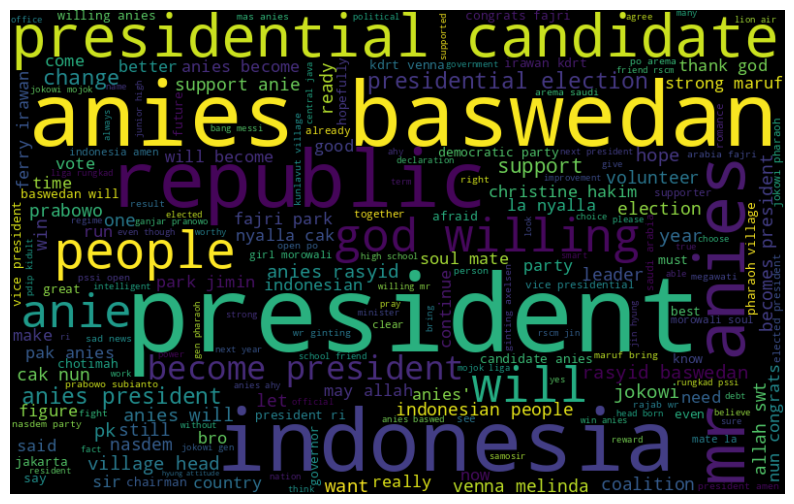

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text from the DataFrame into a single string
all_words = ' '.join([str(text) for text in df_anies['Text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()


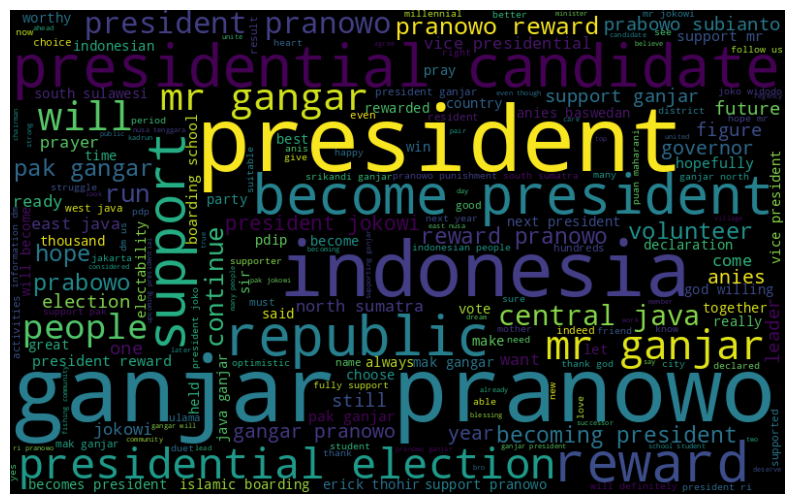

In [ ]:
all_words = ' '.join([str(text) for text in df_ganjar['Text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()


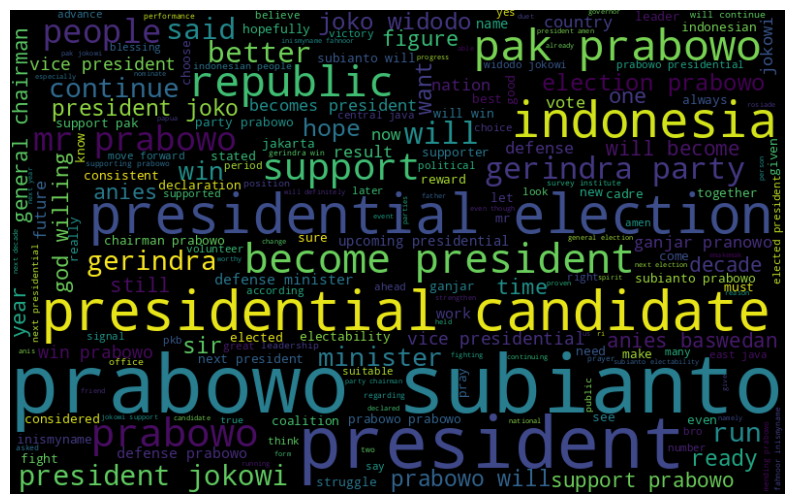

In [ ]:
all_words = ' '.join([str(text) for text in df_prabowo['Text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
from textblob import TextBlob
def label_sentiment_analytic(df):
  df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
  df['subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

  df.loc[df['polarity'] > 0, 'sentiment_analytic'] = 'Positive'
  df.loc[df['polarity'] < 0, 'sentiment_analytic'] = 'Negative'
  df.loc[df['polarity'] == 0, 'sentiment_analytic'] = 'Neutral'

  return df[['Text', 'polarity', 'subjectivity', 'sentiment_analytic']].head()

In [ ]:
df_anies['Text'] = df_anies['Text'].astype(str)
df_ganjar['Text'] = df_ganjar['Text'].astype(str)
df_prabowo['Text'] = df_prabowo['Text'].astype(str)

In [ ]:
label_sentiment_analytic(df_anies)

,Text,polarity,subjectivity,sentiment_analytic
0,anies president info,0.000000,0.000000,Neutral
1,gerindra party politician sandiaga uno answers...,0.000000,0.000000,Neutral
2,"mr. anies continued, we will guard him until h...",0.000000,0.000000,Neutral
3,may allah swt save the nation and state of the...,0.066667,0.633333,Positive
4,"poor chotimah, uncle anies, that's why my fami...",0.200000,0.750000,Positive


In [ ]:
label_sentiment_analytic(df_ganjar)

,Text,polarity,subjectivity,sentiment_analytic
0,"ganjar is getting more and more support, now s...",0.333333,0.666667,Positive
1,ojoo lali yooo who is smart chooses pranowo's ...,0.214286,0.642857,Positive
2,smart people support and reward pranowo well,0.214286,0.642857,Positive
3,we believe that pranowo's reward is a gift fro...,0.250000,0.750000,Positive
4,intelligent people support and reward pranowo ...,0.800000,0.900000,Positive


In [ ]:
label_sentiment_analytic(df_prabowo)

,Text,polarity,subjectivity,sentiment_analytic
0,gemira and semeton bali muslims declare suppor...,0.000,0.000000,Neutral
1,fahnoor inismyname that's why we support the p...,0.000,0.000000,Neutral
2,"this time, jokowi's quota for wrinkles on his ...",0.475,0.537500,Positive
3,"happy birthday to kopassus, may the spirit of ...",0.450,0.666667,Positive
4,gerindra badung party held legislative legisla...,0.000,0.000000,Neutral


**COUNT WITH PLOT LABEL SENTIMENT ALL CANDIDATE (PERCENTAGE %)**

In [ ]:
def plot_label_sentiment(df):
  count = df.loc[:, 'sentiment_analytic'].value_counts()
  Percentage = round(df.loc[:, 'sentiment_analytic'].value_counts(normalize=True)*100, 2)

  df_sentiment = pd.concat([count, Percentage], axis=1, keys=['Count', 'Percentage'])

  my_circle = plt.Circle( (0,0), 0.7, color='white')
  plt.pie(df_sentiment['Count'], labels=df_sentiment.index, colors=['cornflowerblue', 'lightcoral', 'green'], autopct='%1.1f%%')
  p = plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

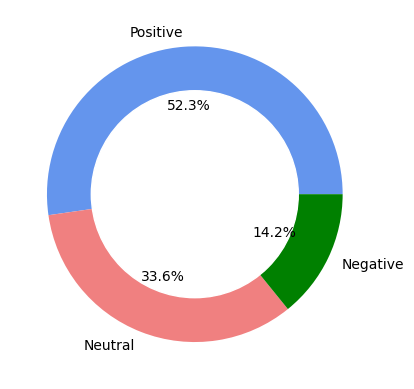

In [ ]:
plot_label_sentiment(df_anies)

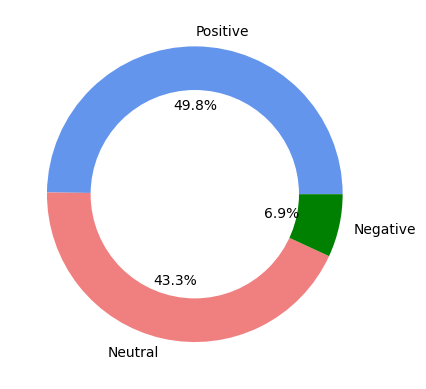

In [ ]:
plot_label_sentiment(df_ganjar)

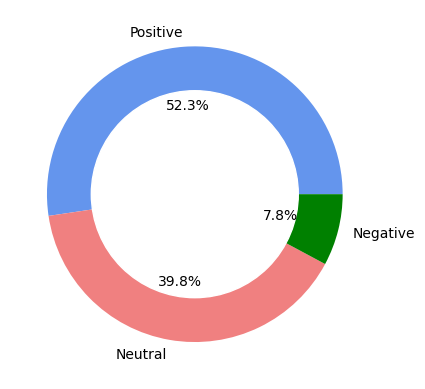

In [ ]:
plot_label_sentiment(df_prabowo)